# Veri Seti İncelemesi

Veriyi okuyarak başlayalım

In [1]:
!pip install keras
!pip install scikeras
!pip install tensorflow
!pip install xgboost
!pip install prophet
!pip install catboost
!pip install lightgbm

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn import metrics

In [2]:
df = pd.read_csv("./data/train.csv")

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


Görüleceği üzere oldukça kapsamlı bir veri seti ile çalışmaktayız. Şimdi ise veri setinin büyüklüğü hakkında bilgi edinelim

In [3]:
df.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Görüleceği üzere veri seti 9800 veri içermektedir. Şimdi ise Order Date sütununu datetime formatına çevirelim

In [5]:
 df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,2016-01-12,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   object        
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9789 non-null   float64       
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

Order Date'e göre sıralayalım

In [7]:
df=df.sort_values(by='Order Date', ascending=True)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
7980,7981,CA-2015-103800,2015-01-03,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,742,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
740,741,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
739,740,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784
1759,1760,CA-2015-141817,2015-01-05,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,1298,CA-2018-115427,2018-12-30,03/01/2019,Standard Class,EB-13975,Erica Bern,Corporate,United States,Fairfield,California,94533.0,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720
906,907,CA-2018-143259,2018-12-30,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,FUR-BO-10003441,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Fully Ass...",323.136
645,646,CA-2018-126221,2018-12-30,05/01/2019,Standard Class,CC-12430,Chuck Clark,Home Office,United States,Columbus,Indiana,47201.0,Central,OFF-AP-10002457,Office Supplies,Appliances,Eureka The Boss Plus 12-Amp Hard Box Upright V...,209.300
908,909,CA-2018-143259,2018-12-30,03/01/2019,Standard Class,PO-18865,Patrick O'Donnell,Consumer,United States,New York City,New York,10009.0,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776


Segment yani müşteri tiplerine göre grafiği inceleyelim


<Axes: title={'center': 'Segmentlere göre toplam satış dağılımı'}, ylabel='Sales'>

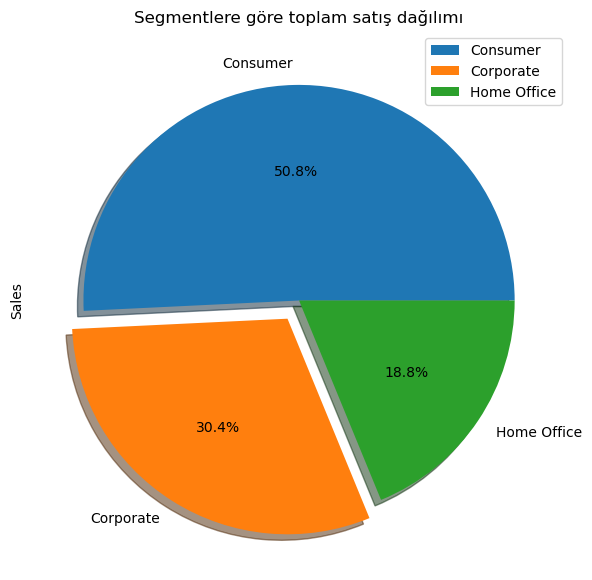

In [8]:
df_sales_per_segment=df[["Segment","Sales"]].groupby(["Segment"]).sum()
df_sales_per_segment.plot.pie(y='Sales', figsize=(7, 7),title="Segmentlere göre toplam satış dağılımı",autopct='%1.1f%%', shadow=True,explode=(0,0.1, 0))

Dataframe'e ekstra olarak haftalık aylık yıllık günlük olarak sınıflandırma yapan columnlar ekleyelim

In [9]:
df['OrderDatePeriodDay'] = df['Order Date'].dt.to_period("D")
df['OrderDatePeriodMonth'] = df['Order Date'].dt.to_period("M")
df['OrderDatePeriodYear'] = df['Order Date'].dt.to_period("Y")
df['OrderDatePeriodWeek'] = df['Order Date'].dt.to_period("W")

In [10]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,OrderDatePeriodDay,OrderDatePeriodMonth,OrderDatePeriodYear,OrderDatePeriodWeek
7980,7981,CA-2015-103800,2015-01-03,07/01/2015,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2015-01-03,2015-01,2015,2014-12-29/2015-01-04
741,742,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2015-01-04,2015-01,2015,2014-12-29/2015-01-04
740,741,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,2015-01-04,2015-01,2015,2014-12-29/2015-01-04
739,740,CA-2015-112326,2015-01-04,08/01/2015,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,2015-01-04,2015-01,2015,2014-12-29/2015-01-04
1759,1760,CA-2015-141817,2015-01-05,12/01/2015,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,2015-01-05,2015-01,2015,2015-01-05/2015-01-11


Aylık periyodlar halinde satışları içeren bir dataframe oluşturalım

In [11]:
df_sales_per_date=df[['OrderDatePeriodMonth','Sales']].groupby('OrderDatePeriodMonth').sum()
df_sales_per_date.head()

,Sales
OrderDatePeriodMonth,
2015-01,14205.707
2015-02,4519.892
2015-03,55205.797
2015-04,27906.855
2015-05,23644.303


Grafik yardımı ile verileri inceleyelim

<Axes: title={'center': 'Satışlar'}, xlabel='Sipariş Tarihi'>

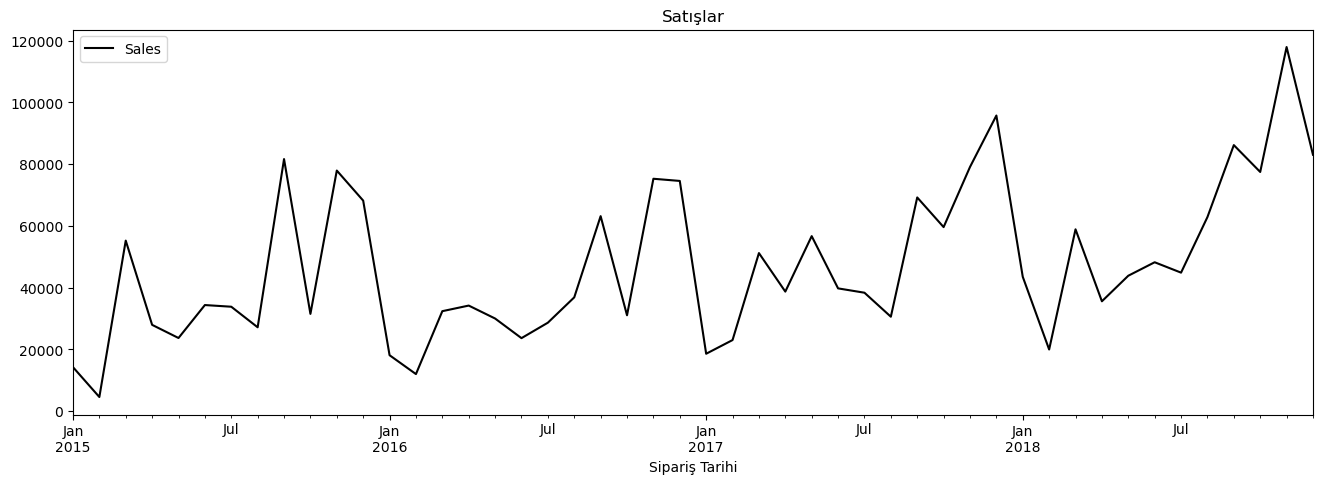

In [12]:
df_sales_per_date.plot(kind='line',y='Sales',xlabel='Sipariş Tarihi',title="Satışlar",figsize=(16,5),color = "black")

Görüleceği üzere veri seti üzerinde bir mevsimsellik (seasonailty) bulunmaktadır. Her yıl için birbirini tekrar eden bir pattern oluşmuştur. Bu mevsimselliği kullanmak üzere SARIMAX modeli oluşturabiliriz.

Model eğitiminde kullanılacak eğitim ve test verisetlerimizi oluşturalım

In [13]:
df_train = df_sales_per_date[df_sales_per_date.index <= pd.to_datetime("2018-07-01", format='%Y-%m-%d').to_period("M")]
df_test = df_sales_per_date[df_sales_per_date.index >= pd.to_datetime("2018-07-01", format='%Y-%m-%d').to_period("M")]

df_train.index = df_train.index.to_timestamp()
df_test.index = df_test.index.to_timestamp()

Satışları test ve training veri setlerine göre çizdirelim

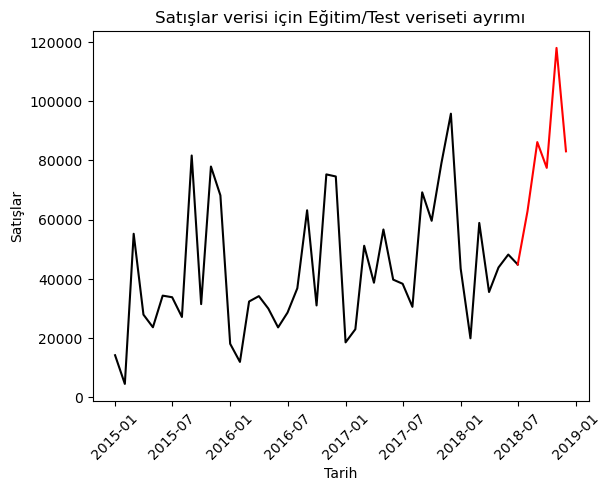

In [14]:
plt.plot(df_train, color = "black")
plt.plot(df_test, color = "red")
plt.ylabel('Satışlar')
plt.xlabel('Tarih')
plt.xticks(rotation=45)
plt.title("Satışlar verisi için Eğitim/Test veriseti ayrımı")
plt.rcParams["figure.figsize"] = (16,5)
plt.show()

Modeli oluşturalım.

Eğitim için seçilecek veriyi ekle

In [15]:
y=df_train['Sales']

12 aylık mevsimsellik oluştur

In [16]:
SARIMAXmodel = SARIMAX(y, seasonal_order=(2,2,2,12))

Eğitimi yap

In [17]:
SARIMAXmodel = SARIMAXmodel.fit()

C:\Users\slayr\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Tahminleri oluştur

In [18]:
y_pred = SARIMAXmodel.get_forecast(len(df_test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df["Predictions"]

Grafik olarak model performansını incele

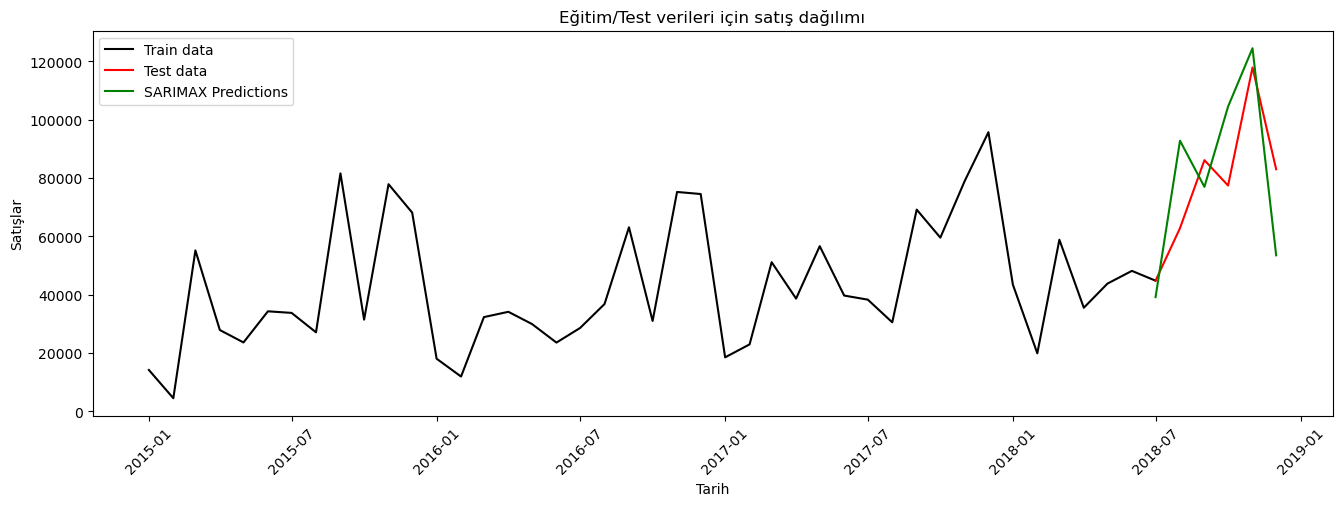

In [19]:
import matplotlib.pyplot as plt
plt.plot(df_train, color = 'black', label = 'Train data')
plt.plot(df_test, color = 'red',label='Test data')
plt.plot(y_pred_out, color='green', label = 'SARIMAX Predictions')
plt.ylabel('Satışlar')
plt.xlabel('Tarih')
plt.xticks(rotation=45)
plt.title("Eğitim/Test verileri için satış dağılımı")
plt.rcParams["figure.figsize"] = (16,5)
plt.legend()
plt.show()

Mean Absolute Error değerini inceleyelim

In [20]:
y_pred_values = y_pred.predicted_mean
metrics.mean_absolute_error(df_test['Sales'], y_pred_values)

17997.577708200028

Grafikte de görüleceği üzere modelimiz oldukça iyi bir iş çıkartmıştır

genel veriseti

In [21]:
# Create a new dataframe with sales per each Period of month
df_sales_genel = df[['OrderDatePeriodMonth', 'Sales']].groupby('OrderDatePeriodMonth').sum()

# Split into train and test sets
train_end = pd.to_datetime("2018-06-01", format='%Y-%m-%d').to_period("M")
df_train_genel = df_sales_genel[df_sales_genel.index <= train_end + 1]
df_test_genel = df_sales_genel[df_sales_genel.index > train_end]

# Convert index to timestamps
df_train_genel.index = df_train_genel.index.to_timestamp()
df_test_genel.index = df_test_genel.index.to_timestamp()
X_train_genel = df_train_genel['Sales'].values.reshape(-1, 1)
y_train_genel = df_train_genel['Sales']
X_test_genel = df_test_genel['Sales'].values.reshape(-1, 1)
y_test_genel = df_test_genel['Sales']

# Haftalık SARIMA

Aynı model fakat bu sefer aylık yerine haftalık verileri kullanacağız.

In [22]:
# Create a new dataframe with sales per each week
df_sales_per_week = df[['OrderDatePeriodWeek', 'Sales']].groupby('OrderDatePeriodWeek').sum()

# Split the dataset into training and testing sets
df_train_week = df_sales_per_week[df_sales_per_week.index <= pd.to_datetime("2018-07-01", format='%Y-%m-%d').to_period("W")]
df_test_week = df_sales_per_week[df_sales_per_week.index >= pd.to_datetime("2018-07-01", format='%Y-%m-%d').to_period("W")]

# Set the index as a timestamp
df_train_week.index = df_train_week.index.to_timestamp()
df_test_week.index = df_test_week.index.to_timestamp()

Bu sefer verileri StandarScaler optimizasyonuna tabi tutacağız

In [23]:
from sklearn.preprocessing import StandardScaler
# Scale the target variable (sales)
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(df_train_week[['Sales']])
y_test_scaled = scaler.transform(df_test_week[['Sales']])

Modeli oluşturalım

In [24]:
# Define the SARIMAX model with the scaled target variable
SARIMAXmodel = SARIMAX(y_train_scaled, seasonal_order=(2,2,2,7))

# Fit the SARIMAX model
SARIMAXmodel = SARIMAXmodel.fit()

# Make predictions
y_pred_scaled = SARIMAXmodel.get_forecast(len(df_test_week.index)).predicted_mean

# Reshape y_pred_scaled to 2D array
y_pred_scaled_2d = y_pred_scaled.reshape(-1, 1)

# Inverse scale the predictions
y_pred = scaler.inverse_transform(y_pred_scaled_2d)

Verileri Görselleştirelim

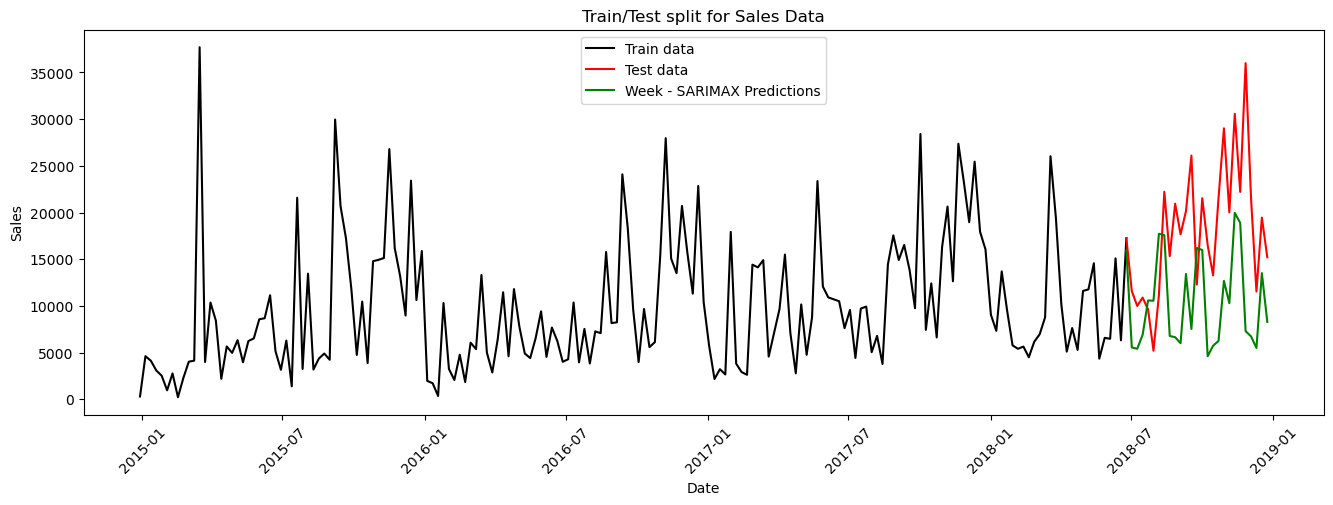

In [25]:
# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train_week, color='black', label='Train data')
plt.plot(df_test_week, color='red', label='Test data')
plt.plot(df_test_week.index, y_pred, color='green', label='Week - SARIMAX Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
plt.show()

Performans metriklerini görüntüleyelim

In [26]:
mae_sarima = metrics.mean_absolute_error(df_test_week['Sales'], y_pred)
mae_sarima

8882.584699557136

Grafikte her ne kadar belli etmese de bu veri aylık bazda SARIMAX'a kıyasla daha iyi performans göstermiştir.

# KNN Modeli
Şimdi ise bu probleme K-Nearest Neighbours yaklaşımı oluşturacağız

KNN için DATA hazırla

In [27]:
def create_features(data):
    data['Month'] = data.index.month
    data['Year'] = data.index.year
    return data

Verileri oluştur

In [28]:
df_train_knn = create_features(df_train.copy())
df_test_knn = create_features(df_test.copy())

X_train_knn = df_train_knn[['Month', 'Year']]
y_train_knn = df_train_knn['Sales']
X_test_knn = df_test_knn[['Month', 'Year']]
y_test_knn = df_test_knn['Sales']

StandarScaler uygula

In [29]:
scaler = StandardScaler()
X_train_scaled_knn = scaler.fit_transform(X_train_knn)
X_test_scaled_knn = scaler.transform(X_test_knn)

GridSearch ile en iyi K parametresini bul

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
# Grid search for optimal K value
param_grid = {'n_neighbors': np.arange(1, 31)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled_knn, y_train_knn)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='neg_mean_squared_error')

En iyi K parametresi 

In [31]:
best_k = grid_search.best_params_['n_neighbors']
best_k

3

Modeli Oluştur

In [32]:
# KNN Model with the optimal K
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train_scaled_knn, y_train_knn)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled_knn)

Sonuçları grafik çizdir

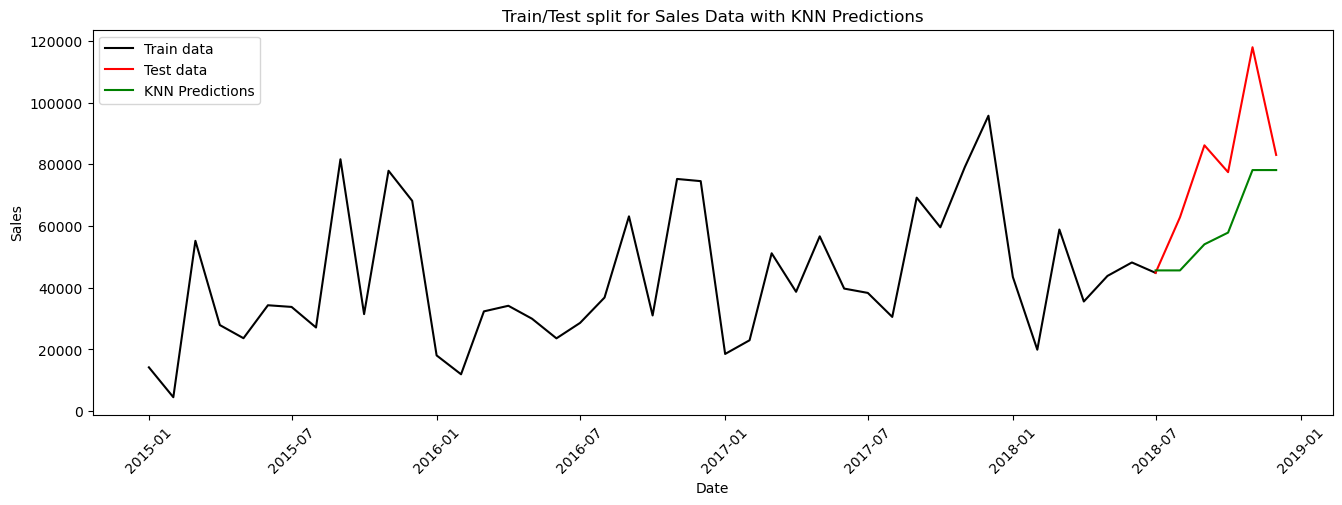

In [33]:
# Plot the results
plt.plot(df_train_knn.index, df_train_knn['Sales'], color='black', label='Train data')
plt.plot(df_test_knn.index, df_test_knn['Sales'], color='red', label='Test data')
plt.plot(df_test_knn.index, y_pred_knn, color='green', label='KNN Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data with KNN Predictions")
plt.rcParams["figure.figsize"] = (16, 5)
plt.legend()
plt.show()

Şimdi ise model performansına bakalım

In [34]:
mae_knn = metrics.mean_absolute_error(df_test_knn['Sales'], y_pred_knn)
mae_knn

19064.381716666667

Grafikte de görüleceği üzere ani düşüşlerden pek etkilenmeyen bir model oluşmuş, bu task için en iyi seçenek olmadığı belli fakat hala iyi bir seçenektir.

# Lineer Regresyon
Şimdi ise bu kadar mevsimselliğin olduğu dataset üzerine dümdüz bir çizgi çekicez. Kesinlikle en iyi yöntem olmayacak, idare eder bir yöntem de değildir.

Verileri hazırla

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
df2 = df_sales_per_date
df2.index = df2.index.to_timestamp()

df2['Time'] = np.arange(len(df2))

# Define features (X) and target variable (y)
X = df2[['Time']]
y = df2['Sales']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False
                                                    , random_state=42)

# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

Grafiği çiz

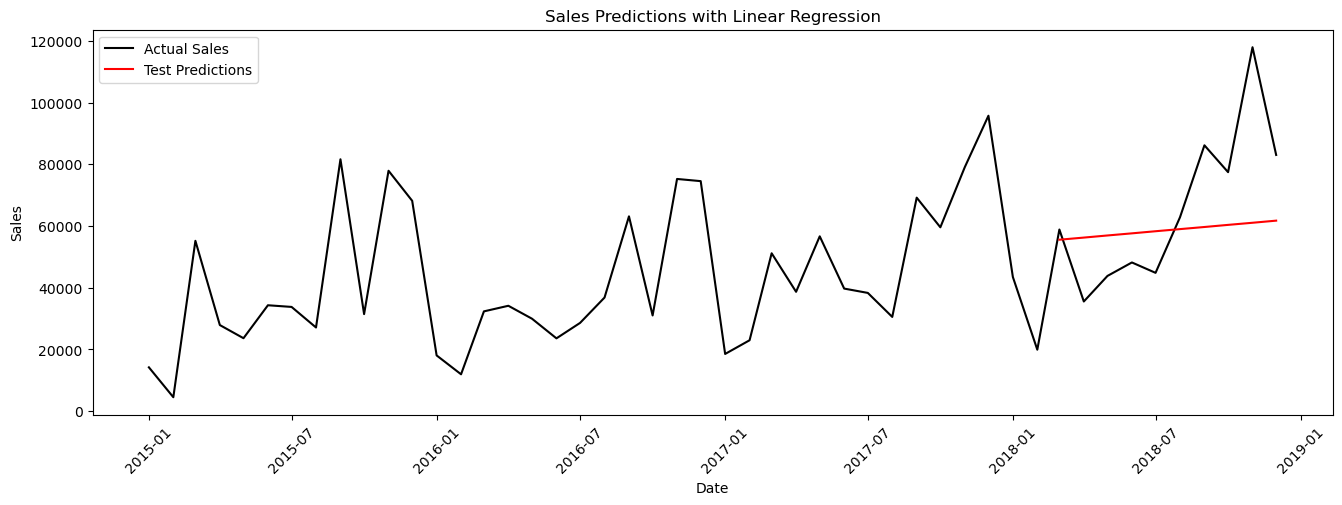

In [36]:
# Plot the results
plt.plot(df2.index, df2['Sales'], color='black', label='Actual Sales')
plt.plot(X_test.index, y_pred, color='red', label='Test Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.title("Sales Predictions with Linear Regression")
plt.legend()
plt.show()

Performans metriği:

In [37]:
mae_lineer = metrics.mean_absolute_error(y_test, y_pred)
mae_lineer

18560.28591345771

# LSTM (Uzun Kısa Süreli Bellek) ile Derin Öğrenme
Şimdi ise LSTM kullanarak sorunumuza derin öğrenme ile çözüm üretmeye çalışacağız

Verilerimizi hazırlayalım

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.src.layers import LSTM, Dense
from keras.src.legacy.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
# Create a new dataframe with sales per each Period of month
df_sales_lstm = df[['OrderDatePeriodMonth', 'Sales']].groupby('OrderDatePeriodMonth').sum()

# Split into train and test sets
train_end = pd.to_datetime("2018-06-01", format='%Y-%m-%d').to_period("M")
df_train_lstm = df_sales_lstm[df_sales_lstm.index <= train_end + 1]
df_test_lstm = df_sales_lstm[df_sales_lstm.index > train_end]

# Convert index to timestamps
df_train_lstm.index = df_train_lstm.index.to_timestamp()
df_test_lstm.index = df_test_lstm.index.to_timestamp()

MinMaxScaler ile verimizi optimize edelim

In [39]:
# Scale the data
scaler = MinMaxScaler()
scaled_train = scaler.fit_transform(df_train_lstm)
scaled_test = scaler.transform(df_test_lstm)

Modelimizi Oluşturalım

In [40]:
# Define and train the LSTM model
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs=50, verbose=0)

# Make predictions
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(df_test_lstm)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

true_predictions = scaler.inverse_transform(test_predictions).flatten()

# Align the predictions with the test data index
df_test_lstm['Predictions'] = true_predictions

C:\Users\slayr\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\slayr\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1492235916.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_lstm['Predictions'] = true_predictions


Çiz

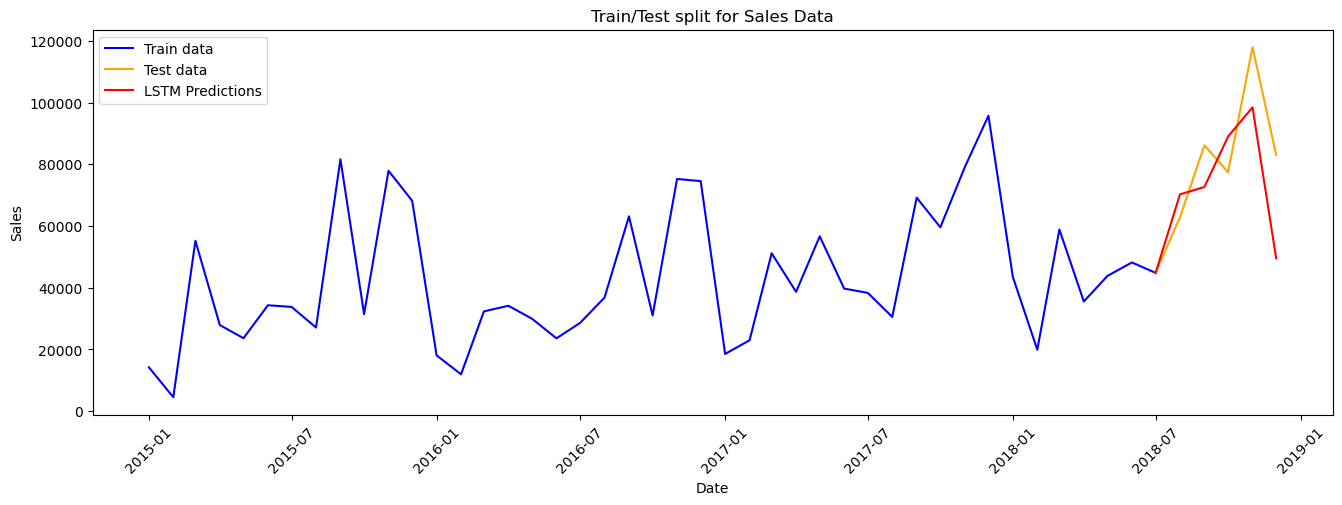

In [41]:
# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train_lstm.index, df_train_lstm['Sales'], color='blue', label='Train data')
plt.plot(df_test_lstm.index, df_test_lstm['Sales'], color='orange', label='Test data')
plt.plot(df_test_lstm.index, df_test_lstm['Predictions'], color='red', label='LSTM Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
plt.show()

Metrikler eh işte

In [42]:
mae_lstm = metrics.mean_absolute_error(df_test_lstm['Sales'], df_test_lstm['Predictions'])
mae_lstm

14259.265024553208

# Convolutional Neural Networks (CNNs)

C:\Users\slayr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1856324185.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_lstm['Predictions'] = true_predictions


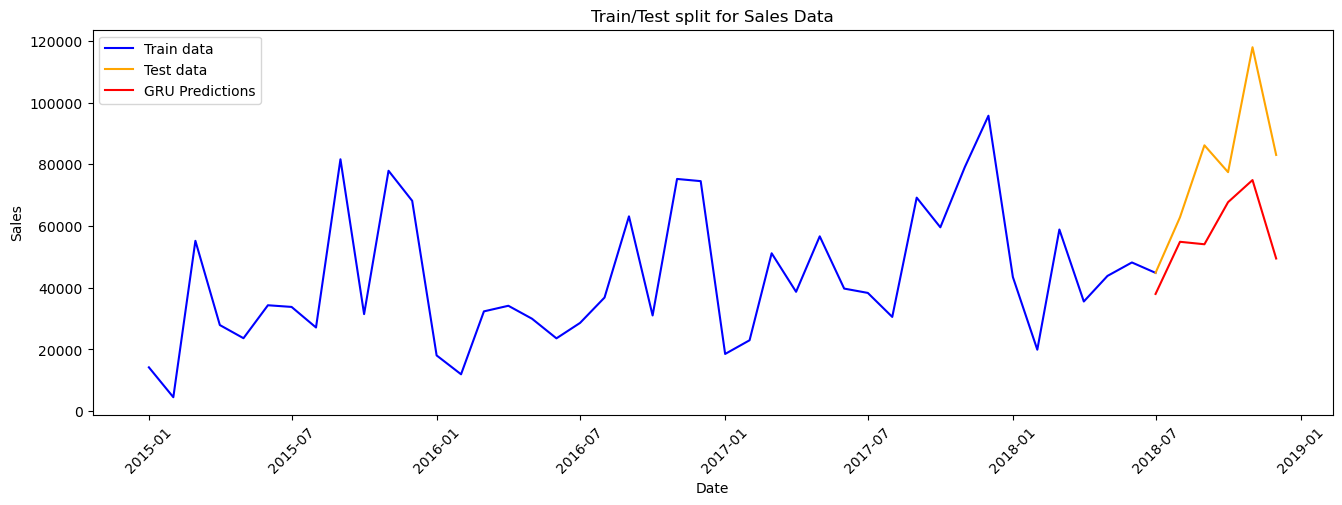

In [43]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(n_input, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs=50, verbose=0)

# Make predictions
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(df_test_lstm)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

true_predictions = scaler.inverse_transform(test_predictions).flatten()

# Align the predictions with the test data index
df_test_lstm['Predictions'] = true_predictions

# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train_lstm.index, df_train_lstm['Sales'], color='blue', label='Train data')
plt.plot(df_test_lstm.index, df_test_lstm['Sales'], color='orange', label='Test data')
plt.plot(df_test_lstm.index, df_test_lstm['Predictions'], color='red', label='GRU Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
plt.show()

Metrikler

In [44]:
mae_cnn = metrics.mean_absolute_error(df_test_lstm['Sales'], df_test_lstm['Predictions'])
mae_cnn

22197.616929057753

# CNN + LSTM

In [45]:
model = Sequential()
model.add(Conv1D(64, kernel_size=2, activation='relu', input_shape=(n_input, n_features)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs=50, verbose=0)

# Make predictions
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(df_test_lstm)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

true_predictions = scaler.inverse_transform(test_predictions).flatten()

# Align the predictions with the test data index
df_test_lstm['Predictions'] = true_predictions

C:\Users\slayr\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1411005157.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_lstm['Predictions'] = true_predictions


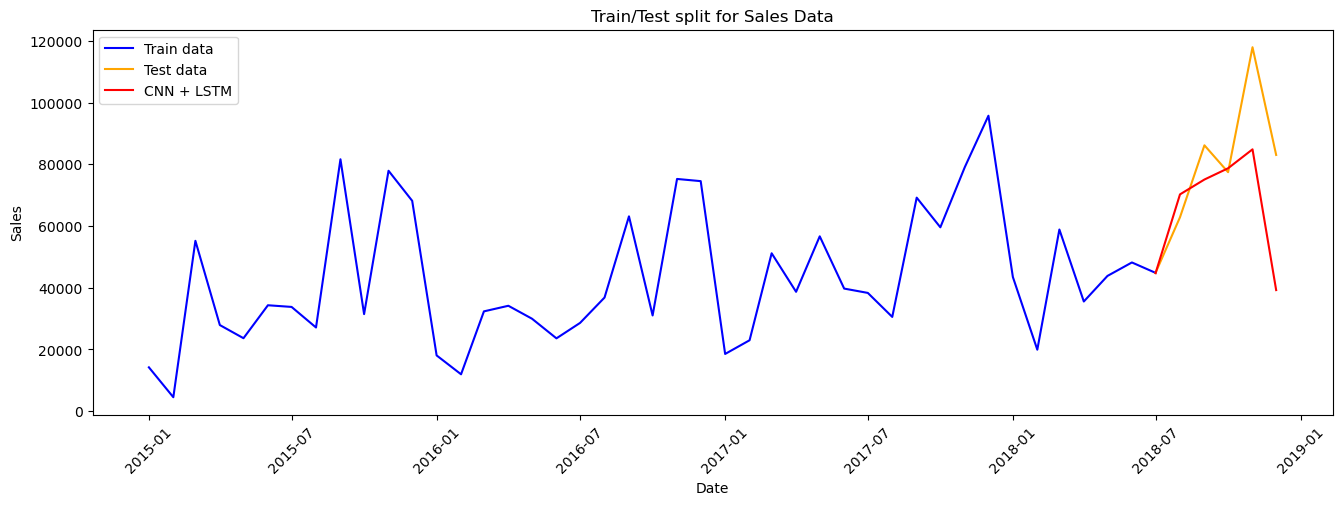

In [46]:
# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train_lstm.index, df_train_lstm['Sales'], color='blue', label='Train data')
plt.plot(df_test_lstm.index, df_test_lstm['Sales'], color='orange', label='Test data')
plt.plot(df_test_lstm.index, df_test_lstm['Predictions'], color='red', label='CNN + LSTM')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
plt.show()

Metrikler

In [47]:
mae_cnnlstm = metrics.mean_absolute_error(df_test_lstm['Sales'], df_test_lstm['Predictions'])
mae_cnnlstm

16128.44812487979

# XGBoost

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Best MAE Score: 3176.9833204712304
Cross-validated MAE: 2851.8743456553825


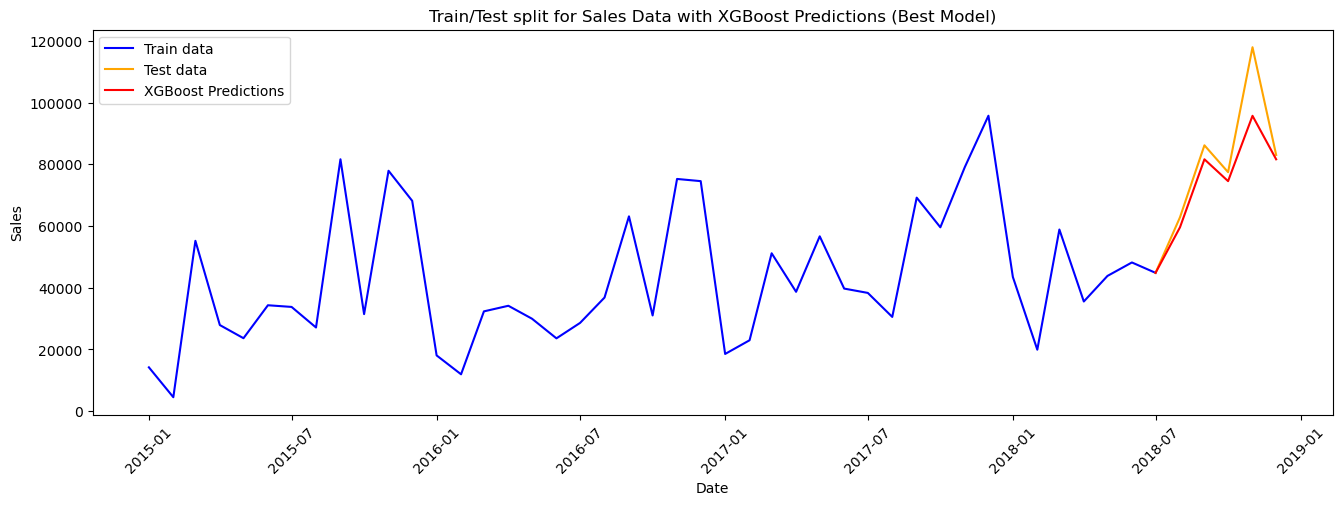

In [48]:
from sklearn.model_selection import GridSearchCV, KFold
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Align the features and targets
X_train_xg = df_train_lstm['Sales'].values.reshape(-1, 1)
y_train_xg = df_train_lstm['Sales']
X_test_xg = df_test_lstm['Sales'].values.reshape(-1, 1)
y_test_xg = df_test_lstm['Sales']

# Ensure target lengths match
y_train_xg = y_train_xg.iloc[:len(X_train_xg)]
y_test_xg = y_test_xg.iloc[:len(X_test_xg)]

# Scale the data
scaler = MinMaxScaler()
X_train_scaled_xg = scaler.fit_transform(X_train_xg)
X_test_scaled_xg = scaler.transform(X_test_xg)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Initialize the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_scaled_xg, y_train_xg)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert from negative MAE to positive

print("Best Parameters:", best_params)
print("Best MAE Score:", best_score)

# Use the best model
best_model = grid_search.best_estimator_

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_mae_scores = []

for train_index, val_index in kf.split(X_train_scaled_xg):
    X_train_fold, X_val_fold = X_train_scaled_xg[train_index], X_train_scaled_xg[val_index]
    y_train_fold, y_val_fold = y_train_xg.iloc[train_index], y_train_xg.iloc[val_index]
    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)
    mae_fold = mean_absolute_error(y_val_fold, y_pred_fold)
    all_mae_scores.append(mae_fold)

# Average cross-validated MAE score
mae_xgboost_cross = sum(all_mae_scores) / len(all_mae_scores)
print("Cross-validated MAE:", mae_xgboost_cross)

# Make predictions
test_predictions = best_model.predict(X_test_scaled_xg)

# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train_lstm.index, df_train_lstm['Sales'], color='blue', label='Train data')
plt.plot(df_test_lstm.index, y_test_xg, color='orange', label='Test data')
plt.plot(df_test_lstm.index, test_predictions, color='red', label='XGBoost Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data with XGBoost Predictions (Best Model)")
plt.legend()
plt.show()


Metrics

In [49]:
mae_xgboost = metrics.mean_absolute_error(y_test_xg, test_predictions)
print("MAE on Test Data:", mae_xgboost)
print("MAE on cross:", mae_xgboost_cross)

MAE on Test Data: 5722.017963541668
MAE on cross: 2851.8743456553825


# Gated Recurrent Units (GRUs)

C:\Users\slayr\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\2244246767.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_lstm['Predictions'] = true_predictions


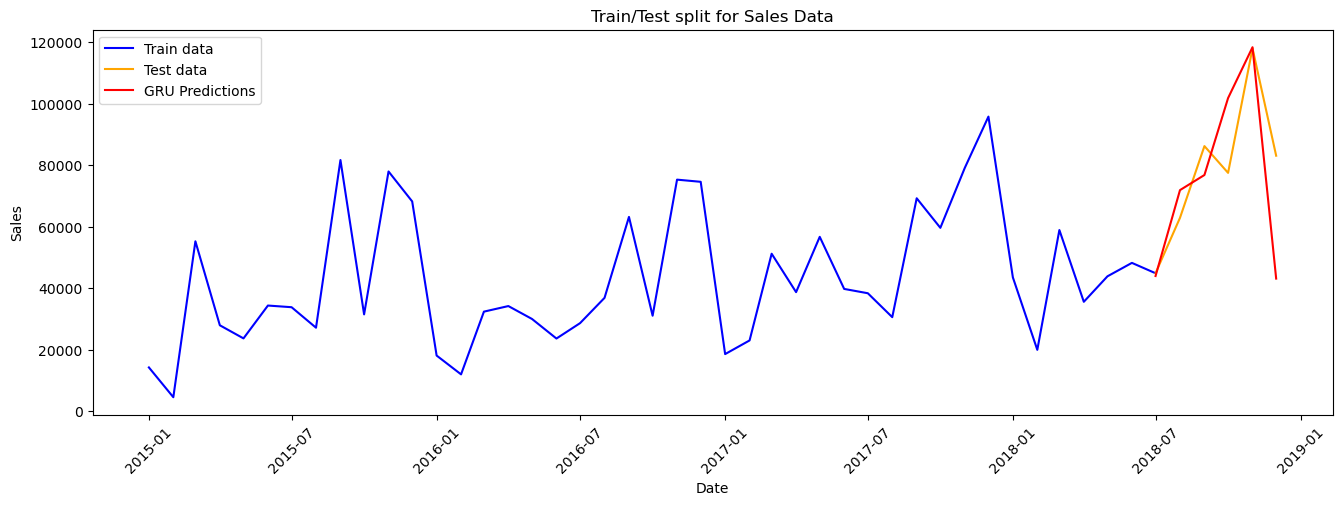

In [50]:
from keras.layers import GRU, Dense
model = Sequential()
model.add(GRU(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(generator, epochs=50, verbose=0)

# Make predictions
test_predictions = []
first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(df_test_lstm)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

true_predictions = scaler.inverse_transform(test_predictions).flatten()

# Align the predictions with the test data index
df_test_lstm['Predictions'] = true_predictions

# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train_lstm.index, df_train_lstm['Sales'], color='blue', label='Train data')
plt.plot(df_test_lstm.index, df_test_lstm['Sales'], color='orange', label='Test data')
plt.plot(df_test_lstm.index, df_test_lstm['Predictions'], color='red', label='GRU Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data")
plt.legend()
plt.show()

Metrikler

In [51]:
mae_gru = metrics.mean_absolute_error(df_test_lstm['Sales'], df_test_lstm['Predictions'])
mae_gru

13988.54730783205

# Prophet

08:28:02 - cmdstanpy - INFO - Chain [1] start processing
08:28:02 - cmdstanpy - INFO - Chain [1] done processing


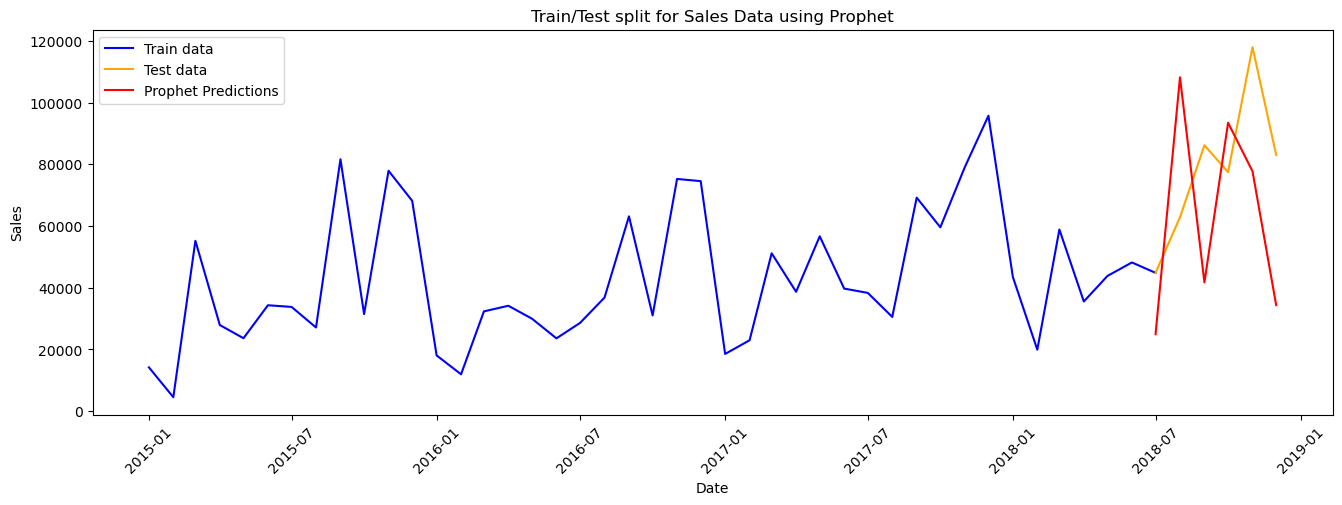

In [52]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Create a new dataframe with sales per each period of month
df_sales_prophet = df[['OrderDatePeriodMonth', 'Sales']].groupby('OrderDatePeriodMonth').sum()

# Split into train and test sets
train_end = pd.to_datetime("2018-06-01", format='%Y-%m-%d').to_period("M")
df_train_prophet = df_sales_prophet[df_sales_prophet.index <= train_end + 1]
df_test_prophet = df_sales_prophet[df_sales_prophet.index > train_end]

# Convert index to timestamps
df_train_prophet.index = df_train_prophet.index.to_timestamp()
df_test_prophet.index = df_test_prophet.index.to_timestamp()

# Prepare the training data
train_data_pr = df_train_prophet.reset_index().rename(columns={'OrderDatePeriodMonth': 'ds', 'Sales': 'y'})

# Define and train the Prophet model
model = Prophet()
model.fit(train_data_pr)

# Make predictions for the test data
future = model.make_future_dataframe(periods=len(df_test_prophet), freq='M')
forecast = model.predict(future)

# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train_prophet.index, df_train_prophet['Sales'], color='blue', label='Train data')
plt.plot(df_test_prophet.index, df_test_prophet['Sales'], color='orange', label='Test data')
plt.plot(df_test_prophet.index, forecast['yhat'][-len(df_test_prophet):], color='red', label='Prophet Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data using Prophet")
plt.legend()
plt.show()


# CatBoost

Best Parameters: {'depth': 6, 'iterations': 500, 'learning_rate': 0.01}
Best MAE Score: 2065.745888181989


C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\3637957679.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\3637957679.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\3637957679.py:38: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To

Cross-validated MAE: 1538.563300149775


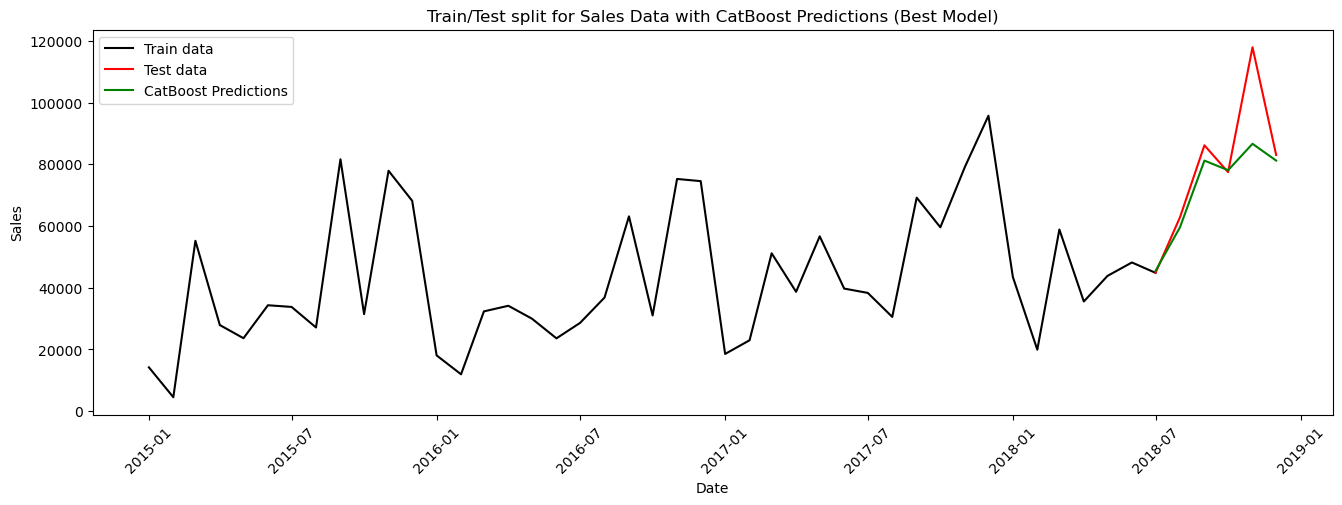

In [53]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10]
}

# Initialize the CatBoostRegressor
catboost_model = CatBoostRegressor(loss_function='MAE', verbose=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', n_jobs=-1)

# Fit the model
grid_search.fit(X_train_xg, y_train_xg)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_  # Convert from negative MAE to positive

print("Best Parameters:", best_params)
print("Best MAE Score:", best_score)

# Use the best model
best_model = grid_search.best_estimator_

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_mae_scores = []

for train_index, val_index in kf.split(X_train_xg):
    X_train_fold, X_val_fold = X_train_xg[train_index], X_train_xg[val_index]
    y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
    best_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_model.predict(X_val_fold)
    mae_fold = metrics.mean_absolute_error(y_val_fold, y_pred_fold)
    all_mae_scores.append(mae_fold)

# Average cross-validated MAE score
mae_catboost_cross = sum(all_mae_scores) / len(all_mae_scores)
print("Cross-validated MAE:", mae_catboost_cross)

# Make predictions
y_pred = best_model.predict(X_test_xg)

# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train.index, df_train['Sales'], color='black', label='Train data')
plt.plot(df_test.index, df_test['Sales'], color='red', label='Test data')
plt.plot(df_test.index, y_pred, color='green', label='CatBoost Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data with CatBoost Predictions (Best Model)")
plt.legend()
plt.show()


In [54]:
mae_catboost = metrics.mean_absolute_error(df_test['Sales'], y_pred)
print("MAE on Test Data:", mae_catboost)
print("MAE on cross:", mae_catboost_cross)


MAE on Test Data: 7100.00370356978
MAE on cross: 1538.563300149775


# Random Forests

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1791707926.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1791707926.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1791707926.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To

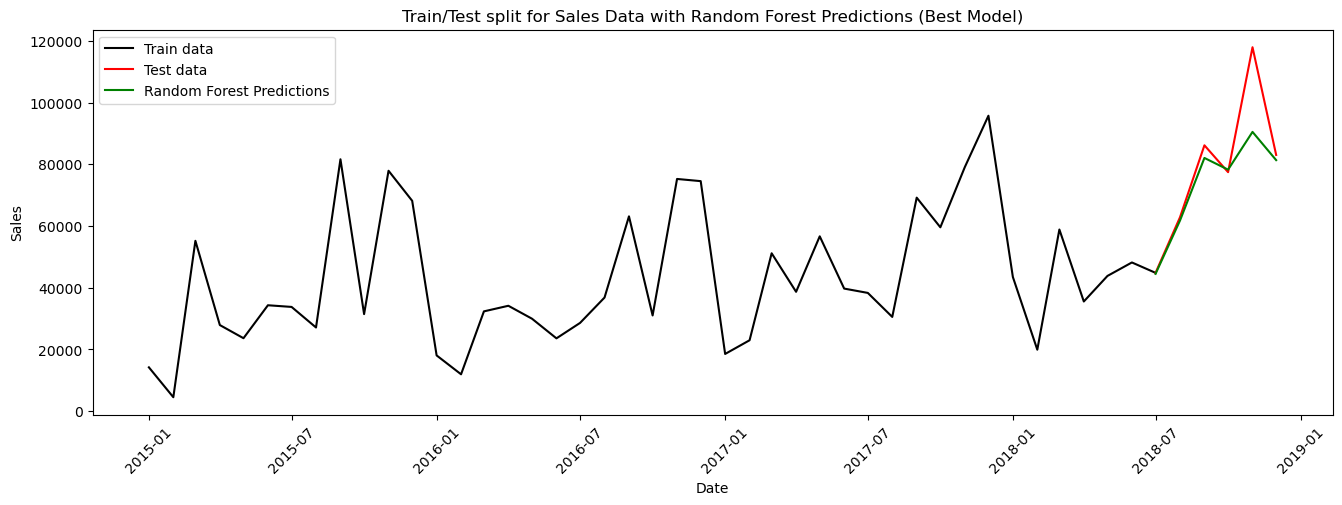

In [55]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_xg, y_train_xg)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_rf_model = grid_search.best_estimator_

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_mae_scores = []

for train_index, val_index in kf.split(X_train_xg):
    X_train_fold, X_val_fold = X_train_xg[train_index], X_train_xg[val_index]
    y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
    best_rf_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_rf_model.predict(X_val_fold)
    mae_fold = metrics.mean_absolute_error(y_val_fold, y_pred_fold)
    all_mae_scores.append(mae_fold)

# Average cross-validated MAE score
mae_random_cross = sum(all_mae_scores) / len(all_mae_scores)

# Use the best model for prediction
y_pred_best = best_rf_model.predict(X_test_xg)

# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train.index, df_train['Sales'], color='black', label='Train data')
plt.plot(df_test.index, df_test['Sales'], color='red', label='Test data')
plt.plot(df_test.index, y_pred_best, color='green', label='Random Forest Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data with Random Forest Predictions (Best Model)")
plt.legend()
plt.show()

# Evaluate the model
mae_random = metrics.mean_absolute_error(df_test['Sales'], y_pred_best)


In [56]:
print("MAE on Test Data:", mae_random)
print("MAE on cross:", mae_random_cross)

MAE on Test Data: 5904.822448888961
MAE on cross: 1571.441965722217


# EXTRA Trees

Fitting 3 folds for each of 162 candidates, totalling 486 fits
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1054433961.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1054433961.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1054433961.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To

Cross-validated MAE: 629.5524866907429


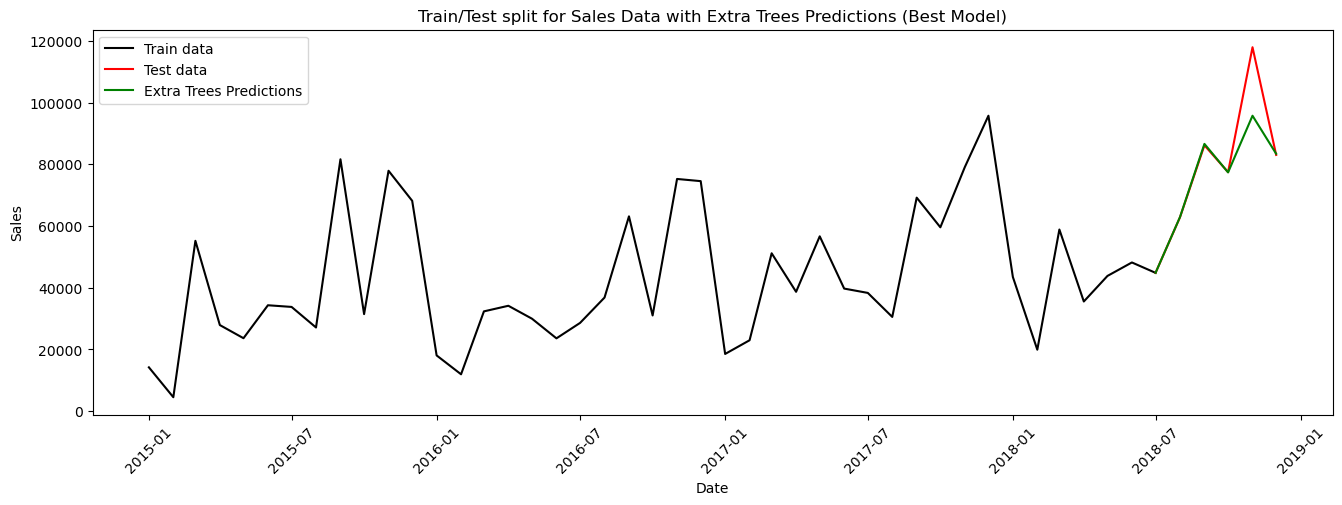

In [57]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Create the Extra Trees regressor
et_model = ExtraTreesRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=et_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_xg, y_train_xg)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_et_model = grid_search.best_estimator_

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_mae_scores = []

for train_index, val_index in kf.split(X_train_xg):
    X_train_fold, X_val_fold = X_train_xg[train_index], X_train_xg[val_index]
    y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
    best_et_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_et_model.predict(X_val_fold)
    mae_fold = metrics.mean_absolute_error(y_val_fold, y_pred_fold)
    all_mae_scores.append(mae_fold)

# Average cross-validated MAE score
mae_xtra_cross = sum(all_mae_scores) / len(all_mae_scores)
print("Cross-validated MAE:", mae_xtra_cross)

# Use the best model for prediction
y_pred_best = best_et_model.predict(X_test_xg)

# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train.index, df_train['Sales'], color='black', label='Train data')
plt.plot(df_test.index, df_test['Sales'], color='red', label='Test data')
plt.plot(df_test.index, y_pred_best, color='green', label='Extra Trees Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data with Extra Trees Predictions (Best Model)")
plt.legend()
plt.show()

# Evaluate the model
mae_xtra = metrics.mean_absolute_error(df_test['Sales'], y_pred_best)


In [58]:
# Evaluate the model
mae_xtra = metrics.mean_absolute_error(df_test['Sales'], y_pred_best)
print("MAE on Test Data:", mae_xtra)
print("MAE on cross:", mae_xtra_cross)

MAE on Test Data: 3862.136709999983
MAE on cross: 629.5524866907429


# AdaBoost

Fitting 3 folds for each of 9 candidates, totalling 27 fits
Best Parameters: {'learning_rate': 1.0, 'n_estimators': 150}


C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1367930661.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1367930661.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1367930661.py:34: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To

Cross-validated MAE: 2205.395927399129


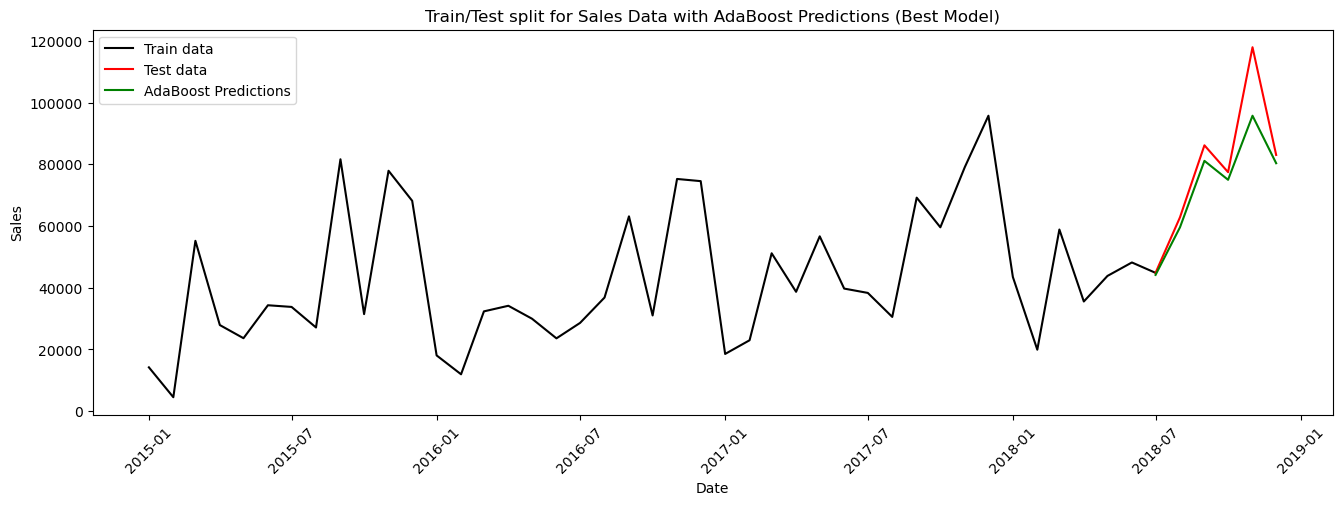

In [59]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
}

# Create the AdaBoost regressor
ada_model = AdaBoostRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ada_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_xg, y_train_xg)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_ada_model = grid_search.best_estimator_

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_mae_scores = []

for train_index, val_index in kf.split(X_train_xg):
    X_train_fold, X_val_fold = X_train_xg[train_index], X_train_xg[val_index]
    y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
    best_ada_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_ada_model.predict(X_val_fold)
    mae_fold = metrics.mean_absolute_error(y_val_fold, y_pred_fold)
    all_mae_scores.append(mae_fold)

# Average cross-validated MAE score
mae_adaboost_cross = sum(all_mae_scores) / len(all_mae_scores)
print("Cross-validated MAE:", mae_adaboost_cross)

# Use the best model for prediction
y_pred_best = best_ada_model.predict(X_test_xg)

# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train.index, df_train['Sales'], color='black', label='Train data')
plt.plot(df_test.index, df_test['Sales'], color='red', label='Test data')
plt.plot(df_test.index, y_pred_best, color='green', label='AdaBoost Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data with AdaBoost Predictions (Best Model)")
plt.legend()
plt.show()

# Evaluate the model
mae_adaboost = metrics.mean_absolute_error(df_test['Sales'], y_pred_best)

In [60]:
# Evaluate
print("MAE on Test Data:", mae_adaboost)
print("MAE on cross:", mae_adaboost_cross)

MAE on Test Data: 6053.578299166667
MAE on cross: 2205.395927399129


# Bagged Trees

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'bootstrap': False, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 0.7, 'n_estimators': 100}


C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1346466815.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1346466815.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1346466815.py:37: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To

Cross-validated MAE: 1592.353912341679


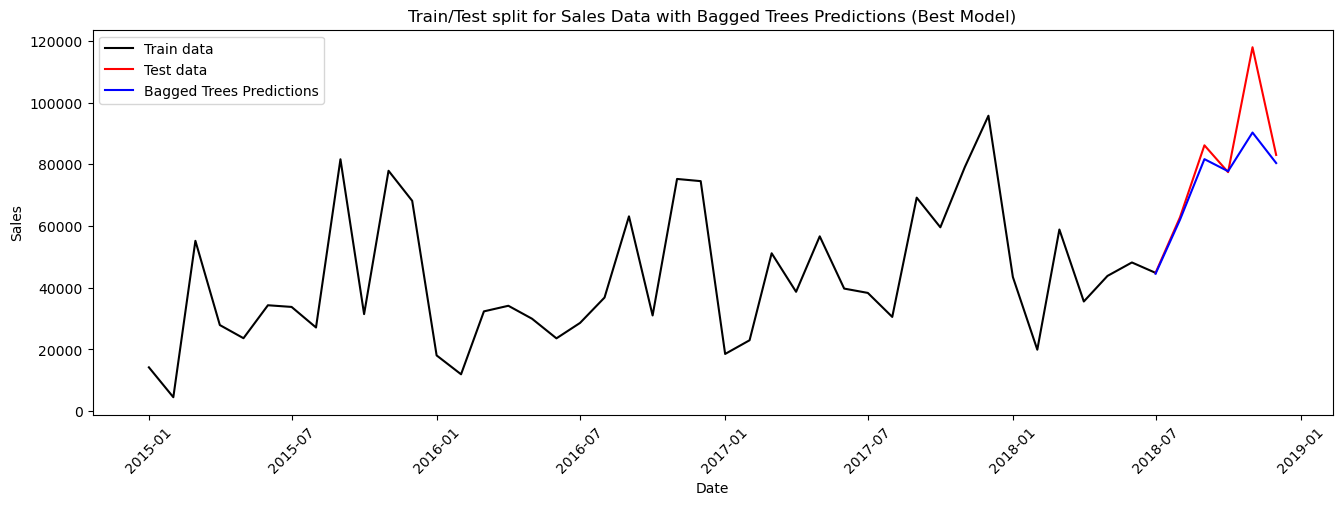

In [61]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
import matplotlib.pyplot as plt

# Define the parameter grid
param_grid_bagged = {
    'n_estimators': [50, 100, 150],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'bootstrap': [True, False],
    'bootstrap_features': [True, False]
}

# Create the Bagged Trees regressor
bagged_model = BaggingRegressor(random_state=42)

# Create the GridSearchCV object
grid_search_bagged = GridSearchCV(estimator=bagged_model, param_grid=param_grid_bagged, cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search_bagged.fit(X_train_xg, y_train_xg)

# Get the best parameters
best_params_bagged = grid_search_bagged.best_params_
print("Best Parameters:", best_params_bagged)

# Use the best model
best_bagged_model = grid_search_bagged.best_estimator_

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_mae_scores = []

for train_index, val_index in kf.split(X_train_xg):
    X_train_fold, X_val_fold = X_train_xg[train_index], X_train_xg[val_index]
    y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
    best_bagged_model.fit(X_train_fold, y_train_fold)
    y_pred_fold = best_bagged_model.predict(X_val_fold)
    mae_fold = metrics.mean_absolute_error(y_val_fold, y_pred_fold)
    all_mae_scores.append(mae_fold)

# Average cross-validated MAE score
mae_bagged_cross = sum(all_mae_scores) / len(all_mae_scores)
print("Cross-validated MAE:", mae_bagged_cross)

# Use the best model for prediction
y_pred_best_bagged = best_bagged_model.predict(X_test_xg)

# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train.index, df_train['Sales'], color='black', label='Train data')
plt.plot(df_test.index, df_test['Sales'], color='red', label='Test data')
plt.plot(df_test.index, y_pred_best_bagged, color='blue', label='Bagged Trees Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data with Bagged Trees Predictions (Best Model)")
plt.legend()
plt.show()

# Evaluate the model
mae_bagged = metrics.mean_absolute_error(df_test['Sales'], y_pred_best_bagged)


In [62]:
# Evaluate
print("MAE on Test Data:", mae_bagged)
print("MAE on cross:", mae_bagged_cross)

MAE on Test Data: 6027.519055333323
MAE on cross: 1592.353912341679


# FFNN

Fitting 3 folds for each of 48 candidates, totalling 144 fits


C:\Users\slayr\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\slayr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'batch_size': 20, 'epochs': 100, 'model__dropout_rate': 0.3, 'model__neurons': 128, 'model__optimizer': 'nadam'}


C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1972674613.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1972674613.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.ilo

C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1972674613.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


C:\Users\slayr\AppData\Local\Temp\ipykernel_8056\1972674613.py:51: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
C:\Users\slayr\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cross-validated MAE: 1701.4024987152784


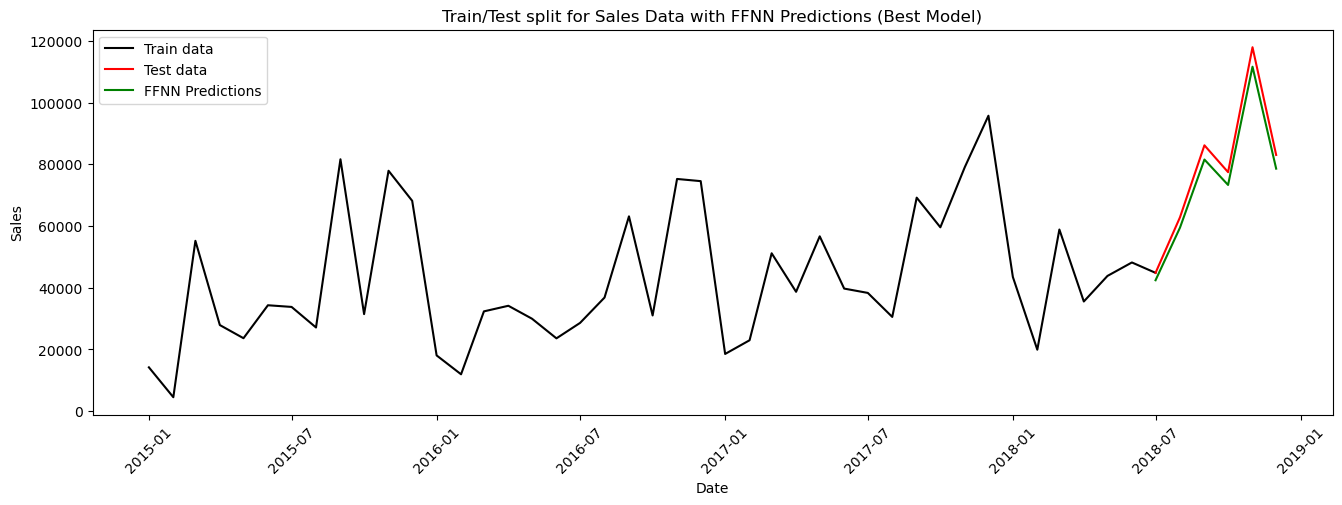

MAE for FFNN on test data: 4212.477109375001


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import Adam, Nadam
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np

# Define the FFNN model
def create_ffnn_model(optimizer='adam', neurons=64, dropout_rate=0.2):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_xg.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons // 2, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_absolute_error', optimizer=optimizer)
    return model

# Create the KerasRegressor
ffnn_model = KerasRegressor(model=create_ffnn_model, verbose=0)

# Define the parameter grid
param_grid = {
    'model__optimizer': ['adam', 'nadam'],
    'model__neurons': [32, 64, 128],
    'model__dropout_rate': [0.2, 0.3],
    'batch_size': [10, 20],
    'epochs': [50, 100]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=ffnn_model, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_xg, y_train_xg)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best model
best_ffnn_model = grid_search.best_estimator_

# Perform cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_mae_scores = []

for train_index, val_index in kf.split(X_train_xg):
    X_train_fold, X_val_fold = X_train_xg[train_index], X_train_xg[val_index]
    y_train_fold, y_val_fold = y_train_xg[train_index], y_train_xg[val_index]
    best_ffnn_model.fit(X_train_fold, y_train_fold, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=0)
    y_pred_fold = best_ffnn_model.predict(X_val_fold)
    mae_fold = metrics.mean_absolute_error(y_val_fold, y_pred_fold)
    all_mae_scores.append(mae_fold)

# Average cross-validated MAE score
mae_ffnn_cross = sum(all_mae_scores) / len(all_mae_scores)
print("Cross-validated MAE:", mae_ffnn_cross)

# Use the best model for prediction
y_pred_best = best_ffnn_model.predict(X_test_xg)

# Plot the results
plt.figure(figsize=(16, 5))
plt.plot(df_train.index, df_train['Sales'], color='black', label='Train data')
plt.plot(df_test.index, df_test['Sales'], color='red', label='Test data')
plt.plot(df_test.index, y_pred_best, color='green', label='FFNN Predictions')
plt.ylabel('Sales')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Sales Data with FFNN Predictions (Best Model)")
plt.legend()
plt.show()

# Evaluate the model
mae_ffnn = metrics.mean_absolute_error(df_test['Sales'], y_pred_best)
print("MAE for FFNN on test data:", mae_ffnn)


In [64]:
# Evaluate
print("MAE on Test Data:", mae_ffnn)
print("MAE on cross:", mae_ffnn_cross)

MAE on Test Data: 4212.477109375001
MAE on cross: 1701.4024987152784


# Ridge Regresyonu

In [65]:
from sklearn.linear_model import Ridge
# Set up the parameter grid for Ridge Regression
param_grid = {'alpha': np.logspace(-3, 3, 14)}
# Create and train the Ridge Regression model with GridSearchCV
ridge_model = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_absolute_error')
ridge_model.fit(X_train, y_train)

# Best alpha value
best_alpha = ridge_model.best_params_['alpha']
print(f'Optimal alpha value: {best_alpha}')

# Make predictions
y_pred_ridge = ridge_model.predict(X_test)

Optimal alpha value: 0.001


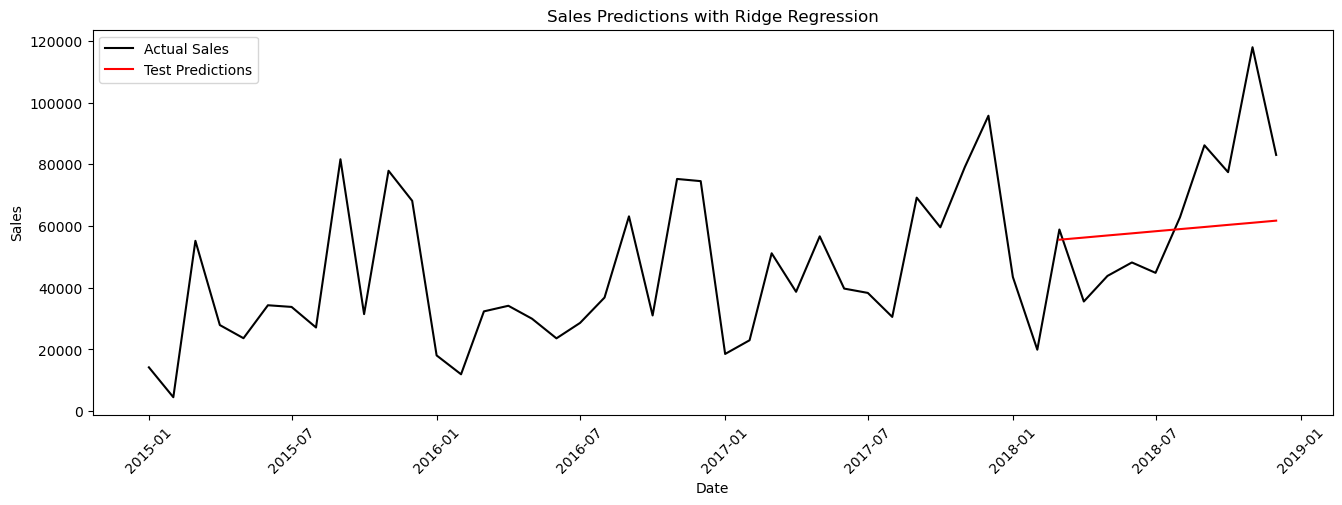

In [66]:
# Plot the results
plt.plot(df_sales_per_date.index, df_sales_per_date['Sales'], color='black', label='Actual Sales')
plt.plot(X_test.index, y_pred_ridge, color='red', label='Test Predictions')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.title("Sales Predictions with Ridge Regression")
plt.legend()
plt.show()

In [67]:
mae_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)
mae_ridge

18560.286874657144

# Modellerin Karşılaştırılması

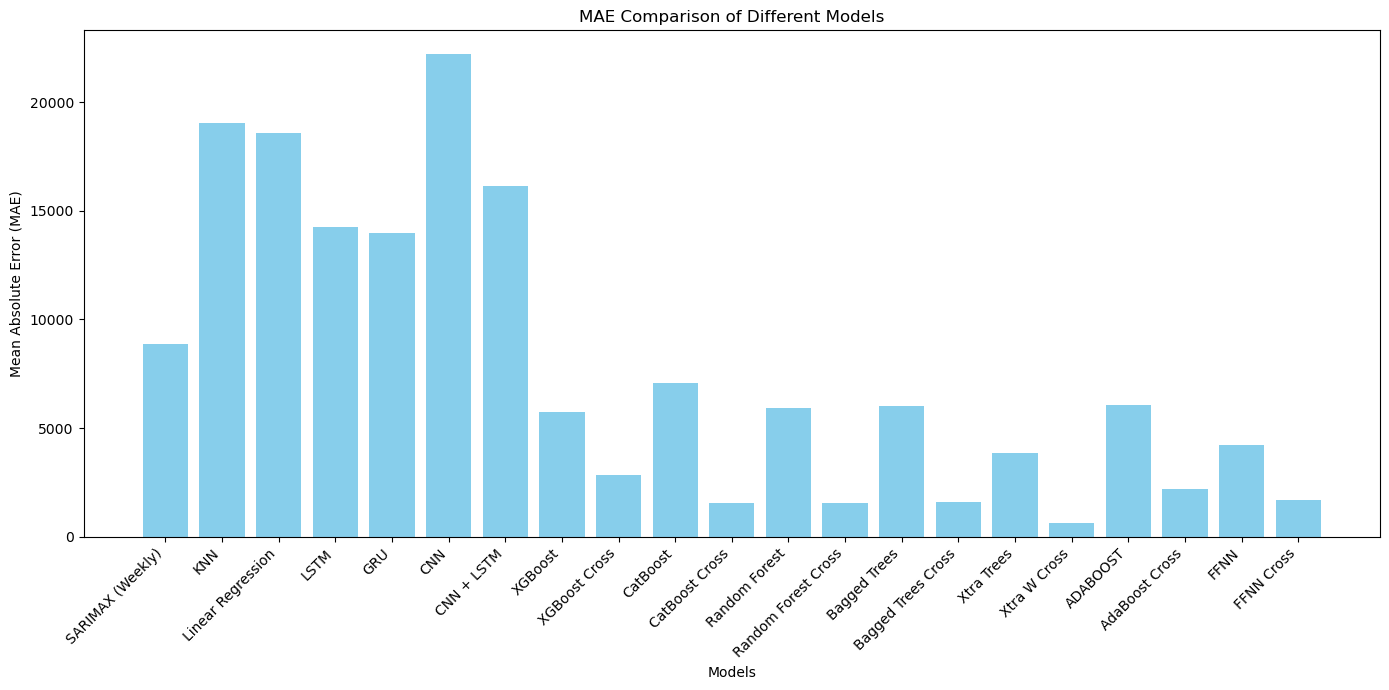

In [68]:
import matplotlib.pyplot as plt

# MAE values for each model (replace these with your actual values)
mae_values = {
    "SARIMAX (Weekly)": mae_sarima,
    "KNN": mae_knn,
    "Linear Regression": mae_lineer,
    "LSTM": mae_lstm,
    "GRU": mae_gru,
    "CNN": mae_cnn,
    "CNN + LSTM": mae_cnnlstm,
    "XGBoost": mae_xgboost,
    "XGBoost Cross":mae_xgboost_cross,
    # "Prophet": mae_prophet,
    "CatBoost": mae_catboost,
    "CatBoost Cross":mae_catboost_cross,
    "Random Forest": mae_random,
    "Random Forest Cross": mae_random_cross,
    "Bagged Trees": mae_bagged,
    "Bagged Trees Cross":mae_bagged_cross,
    "Xtra Trees": mae_xtra,
    "Xtra W Cross": mae_xtra_cross,
    "ADABOOST": mae_adaboost,
    "AdaBoost Cross": mae_adaboost_cross,
    "FFNN": mae_ffnn,
    "FFNN Cross": mae_ffnn_cross,
}
# Extract keys and values
models = list(mae_values.keys())
mae = list(mae_values.values())

# Create the bar chart
plt.figure(figsize=(14, 7))
plt.bar(models, mae, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()